In [365]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

## Read the data

In [366]:
# Read the data
data = pd.read_csv('preprocessed_EEG.csv')

In [367]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [343]:
data

,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,psdtheta_4,...,psdbeta_13,psdtheta_14,psdalpha_14,psdbeta_14,age,gender,participant,video,video_name,target
0,-0.150843,-0.150624,-0.166261,-0.145117,-0.143640,-0.119170,-0.475254,-0.468150,-0.330365,-0.427103,...,-0.419732,-0.195563,-0.195812,-0.204449,22,0,1,1,10,7
1,-0.128521,-0.129717,-0.155580,-0.105668,-0.108871,-0.168438,0.302383,0.258150,-0.121029,-0.052994,...,-0.175393,-0.153317,-0.153977,-0.166154,22,0,1,2,2,0
2,-0.103209,-0.103515,-0.122637,-0.109388,-0.111235,-0.140875,0.063157,0.057745,0.006707,-0.081610,...,-0.117177,-0.046608,-0.046963,-0.051510,22,0,1,3,14,2
3,-0.181723,-0.184244,-0.230825,-0.113030,-0.114522,-0.139100,-0.067104,-0.068218,-0.071644,-0.130311,...,-0.311654,-0.150296,-0.150274,-0.153138,22,0,1,4,15,5
4,-0.043894,-0.042331,-0.032673,-0.148676,-0.152181,-0.201394,0.314590,0.301284,0.191730,-0.023894,...,0.125982,0.075506,0.078709,0.108396,22,0,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.259796,-0.264659,-0.351959,-0.215325,-0.223008,-0.347720,-0.282586,-0.281040,-0.263415,-0.350000,...,0.063415,-0.052881,-0.052248,-0.049186,25,0,23,14,3,4
410,-0.220586,-0.227271,-0.333407,-0.083146,-0.084745,-0.115249,-0.452527,-0.461702,-0.518178,-0.551788,...,-0.490378,0.071075,0.065080,0.012865,25,0,23,15,8,5
411,-0.054579,-0.056091,-0.082380,0.014625,0.014887,0.025082,0.225323,0.234515,0.292967,0.233246,...,-0.042684,-0.025692,-0.028928,-0.061149,25,0,23,16,11,1
412,-0.242060,-0.244057,-0.288320,-0.134908,-0.139699,-0.208673,-0.238502,-0.241715,-0.257637,-0.356707,...,-0.480054,-0.119080,-0.118926,-0.121816,25,0,23,17,16,8


In [368]:
y = data.target
X = data.drop('target' , axis = 1)

## Splitting the data

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [372]:
y_test = np.array(y_test)

In [349]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

### Choosing the best k value

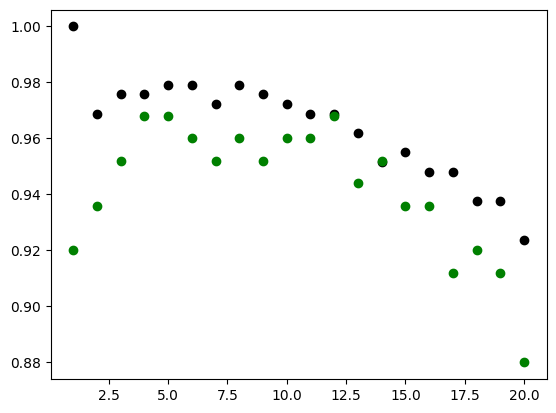

In [350]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Making the model

In [351]:
# KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    # create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    # fit the model
    KNN.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    # predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [352]:
KNN_test, KNN_train, KNN_prediction = KNN(X_train, y_train, X_test, y_test, 12)
print(KNN_test, KNN_train)

0.968 0.9688581314878892


### Evaluating the model

In [353]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test, KNN_prediction)

TypeError: 'numpy.float64' object is not callable

In [259]:
Scores = {
    "Model":["KNN"],\
    "Accuracy":[accuracy_score*100],\
    "Precision":[precision_score*100],\
    "Recall":[recall_score*100],\
    "F1":[f1_score*100]
    }

Scores=pd.DataFrame(Scores)
Scores

TypeError: unsupported operand type(s) for *: 'function' and 'int'

# SVM models

In [354]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    # create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    # fit the model
    SVM.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    # predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [355]:
# SVM classifier using linear kernel
SVM_linear_test, SVM_linear_train, SVM_linear_prediction = SVM(X_train, y_train, X_test, y_test, 'linear')
print(SVM_linear_test, SVM_linear_train)

0.568 0.6539792387543253


In [356]:
# SVM classifier using RBF kernel
SVM_rbf_test, SVM_rbf_train, SVM_rbf_prediction = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(SVM_rbf_test, SVM_rbf_train)

0.512 0.6505190311418685


In [357]:
# SVM classifier using sigmoid kernel
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(SVM_sigmoid_test, SVM_sigmoid_train)

0.16 0.17301038062283736


In [358]:
# SVM classifier using polynomial kernel
SVM_poly_test, SVM_poly_train, SVM_poly_prediction = SVM(X_train, y_train, X_test, y_test, 'poly')
print(SVM_poly_test, SVM_poly_train)

0.456 0.5363321799307958


### Evaluating the models

In [202]:
accuracy_score_poly, precision_score_poly, recall_score_poly, f1_score_poly = Evaluate(y_test, SVM_poly_prediction)

accuracy_score_linear, precision_score_linear, recall_score_linear, f1_score_linear = Evaluate(y_test, SVM_linear_prediction)

accuracy_score_sigmoid, precision_score_sigmoid, recall_score_sigmoid, f1_score_sigmoid = Evaluate(y_test, SVM_sigmoid_prediction)

accuracy_score_rbf, precision_score_rbf, recall_score_rbf, f1_score_rbf = Evaluate(y_test, SVM_rbf_prediction)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Scores = {
    "Model":["Linear SVM","RBF SVM","Sigmoid SVM","Poly SVM"],\
    "Accuracy":[accuracy_score_linear*100, accuracy_score_rbf*100, accuracy_score_sigmoid*100, accuracy_score_poly*100],\
    "Precision":[precision_score_linear*100, precision_score_rbf*100, precision_score_sigmoid*100, precision_score_poly*100],\
    "Recall":[recall_score_linear*100, recall_score_rbf*100, recall_score_sigmoid*100, recall_score_poly*100],\
    "F1":[f1_score_linear*100, f1_score_rbf*100, f1_score_sigmoid*100, f1_score_poly*100]
    }

Scores=pd.DataFrame(Scores)
Scores

In [362]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Logistic Regression model

In [373]:
def Logistic_Regression (X_train, y_train, X_test, y_test):
    # create the model
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # fit the model
    log_reg.fit(X_train, y_train)

    # get the accuracy
    test_accuracy = log_reg.score(X_test, y_test)
    train_accuracy = log_reg.score(X_train, y_train)

    # predict the values
    prediction = log_reg.predict(X_test)

    return test_accuracy, train_accuracy, prediction

In [374]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction = Logistic_Regression(X_train, y_train, X_test, y_test)
print(LOG_REG_test, LOG_REG_train)

0.288 0.4083044982698962


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LOG_REG_accuracy, LOG_REG_ = Evaluate(y_test, LOG_REG_prediction)